In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.animation
import yaml
import cv2
from scipy.spatial.transform import Rotation
from matplotlib.patches import Rectangle
from tqdm import tqdm


# sys.path.append('/local_code/hpe-core/datasets/')
sys.path.append('/home/schiavazza/code/hpe/hpe-core/datasets/')

from vicon_processing.src.projection import ProjectionHelper
from vicon_processing.src.data_helpers import DvsLabeler, DvsHelper, C3dHelper
from vicon_processing.src import vis_utils, utils

In [2]:
# import the DVS data
dvs_file_path = '/hpe/Users/Stefano/hpe/vicon/side_f1_s/atis-s/'
dvs_helper = DvsHelper(dvs_file_path)

no manual zero time found, using zero instead


In [31]:
dvs_helper.read_points_labels('../scripts/config/side_s_labels.yml');
labels_times = np.array(dvs_helper.labeled_points['times'])[[1, 2, 3]]
print(labels_times)
# labels_times = [0.0]

[0.1   0.375 0.65  0.925 1.2  ]


In [32]:
dvs_helper.labeled_points

{'points': [{'P3:HEDO': {'x': 778, 'y': 134},
   'P3:LFOO': {'x': 805, 'y': 618},
   'P3:RFOO': {'x': 701, 'y': 614},
   'P3:RHNO': {'x': 715, 'y': 353}},
  {'P3:HEDO': {'x': 789, 'y': 152},
   'P3:LFOO': {'x': 836, 'y': 648},
   'P3:RFOO': {'x': 695, 'y': 638},
   'P3:RHNO': {'x': 682, 'y': 322}},
  {'P3:HEDO': {'x': 798, 'y': 132},
   'P3:LFOO': {'x': 799, 'y': 649},
   'P3:RFOO': {'x': 693, 'y': 654},
   'P3:RHNO': {'x': 693, 'y': 395}},
  {'P3:HEDO': {'x': 804, 'y': 144},
   'P3:LFOO': {'x': 797, 'y': 667},
   'P3:RFOO': {'x': 695, 'y': 654},
   'P3:RHNO': {'x': 692, 'y': 421}},
  {'P3:HEDO': {'x': 809, 'y': 158},
   'P3:LFOO': {'x': 801, 'y': 651},
   'P3:RFOO': {'x': 603, 'y': 648},
   'P3:RHNO': {'x': 656, 'y': 393}}],
 'times': [0.1, 0.375, 0.6499999999999999, 0.9249999999999999, 1.2]}

In [33]:
labels = list(dvs_helper.labeled_points['points'][0].keys())
print(labels)

['P3:HEDO', 'P3:LFOO', 'P3:RFOO', 'P3:RHNO']


In [34]:
# load c3d vicon data
c3d_file_path = '/home/schiavazza/data/hpe/vicon/side_f1.c3d'
c3d_helper = C3dHelper(c3d_file_path, delay=0.214, camera_markers=False)
print(c3d_helper.reader.point_labels)

Selected the option to not use the markers on the camera, the identity transformation will be used instead
['camera:cam_right              ' 'camera:cam_back               '
 'camera:cam_left               ' 'P3:PELO                       '
 'P3:PELA                       ' 'P3:PELL                       '
 'P3:PELP                       ' 'P3:LFEO                       '
 'P3:LFEA                       ' 'P3:LFEL                       '
 'P3:LFEP                       ' 'P3:LTIO                       '
 'P3:LTIA                       ' 'P3:LTIL                       '
 'P3:LTIP                       ' 'P3:LFOO                       '
 'P3:LFOA                       ' 'P3:LFOL                       '
 'P3:LFOP                       ' 'P3:LTOO                       '
 'P3:LTOA                       ' 'P3:LTOL                       '
 'P3:LTOP                       ' 'P3:RFEO                       '
 'P3:RFEA                       ' 'P3:RFEL                       '
 'P3:RFEP             

In [35]:
c3d_helper.reader.frame_count

1711

In [36]:
# labels_times = [8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
vicon_labeled_frames = c3d_helper.get_frame_time(labels_times)
print(c3d_helper.frame_times)
vicon_points = c3d_helper.get_vicon_points(vicon_labeled_frames, labels)
vicon_points_mark = c3d_helper.transform_points_to_marker_frame(vicon_points)
# vicon_points_mark = vicon_points
print(vicon_labeled_frames)

[-0.214      -0.20399415 -0.1939883  ... 16.8759883  16.88599415
 16.896     ]
[32, 59, 87, 114, 142]


In [37]:
c3d_helper.get_vicon_points(vicon_labeled_frames, labels)

{'points': [{'P3:HEDO': array([ 836.4682,  883.9859, 1544.9095], dtype=float32),
   'P3:LFOO': array([718.33185 , 700.4603  ,  52.355423], dtype=float32),
   'P3:RFOO': array([ 725.6859 , 1120.2766 ,   78.59463], dtype=float32),
   'P3:RHNO': array([ 437.32782, 1192.2056 , 1085.4171 ], dtype=float32)},
  {'P3:HEDO': array([ 832.93677,  880.06506, 1543.835  ], dtype=float32),
   'P3:LFOO': array([719.1617  , 699.7829  ,  52.147186], dtype=float32),
   'P3:RFOO': array([ 725.7273, 1120.4426,   78.446 ], dtype=float32),
   'P3:RHNO': array([ 430.2881, 1185.9681, 1094.0225], dtype=float32)},
  {'P3:HEDO': array([ 828.9521 ,  873.90576, 1595.0579 ], dtype=float32),
   'P3:LFOO': array([718.32776 , 698.0034  ,  53.281467], dtype=float32),
   'P3:RFOO': array([ 724.2587 , 1123.809  ,   78.06489], dtype=float32),
   'P3:RHNO': array([ 505.8685 , 1180.9762 ,  882.82965], dtype=float32)},
  {'P3:HEDO': array([ 795.3882,  848.006 , 1582.6128], dtype=float32),
   'P3:LFOO': array([719.25555, 698.9

In [38]:
c3d_helper.markers_T

{}

In [39]:
print(f"times from dvs labels: {dvs_helper.labeled_points['times']}")
print(f"times from vicon labels: {vicon_points_mark['times']}")

times from dvs labels: [0.1, 0.375, 0.6499999999999999, 0.9249999999999999, 1.2]
times from vicon labels: [0.10618713 0.37634503 0.65650877 0.92666667 1.20683041]


In [40]:
dvs_helper.labeled_points

{'points': [{'P3:HEDO': {'x': 778, 'y': 134},
   'P3:LFOO': {'x': 805, 'y': 618},
   'P3:RFOO': {'x': 701, 'y': 614},
   'P3:RHNO': {'x': 715, 'y': 353}},
  {'P3:HEDO': {'x': 789, 'y': 152},
   'P3:LFOO': {'x': 836, 'y': 648},
   'P3:RFOO': {'x': 695, 'y': 638},
   'P3:RHNO': {'x': 682, 'y': 322}},
  {'P3:HEDO': {'x': 798, 'y': 132},
   'P3:LFOO': {'x': 799, 'y': 649},
   'P3:RFOO': {'x': 693, 'y': 654},
   'P3:RHNO': {'x': 693, 'y': 395}},
  {'P3:HEDO': {'x': 804, 'y': 144},
   'P3:LFOO': {'x': 797, 'y': 667},
   'P3:RFOO': {'x': 695, 'y': 654},
   'P3:RHNO': {'x': 692, 'y': 421}},
  {'P3:HEDO': {'x': 809, 'y': 158},
   'P3:LFOO': {'x': 801, 'y': 651},
   'P3:RFOO': {'x': 603, 'y': 648},
   'P3:RHNO': {'x': 656, 'y': 393}}],
 'times': [0.1, 0.375, 0.6499999999999999, 0.9249999999999999, 1.2]}

In [41]:
vicon_points_mark

{'points': [{'P3:HEDO': array([ 836.46820068,  883.98590088, 1544.9095459 ,    1.        ]),
   'P3:LFOO': array([718.33184814, 700.46032715,  52.35542297,   1.        ]),
   'P3:RFOO': array([ 725.68591309, 1120.27661133,   78.59462738,    1.        ]),
   'P3:RHNO': array([ 437.32781982, 1192.20556641, 1085.41711426,    1.        ])},
  {'P3:HEDO': array([ 832.93676758,  880.06506348, 1543.83496094,    1.        ]),
   'P3:LFOO': array([719.16168213, 699.78289795,  52.14718628,   1.        ]),
   'P3:RFOO': array([ 725.72729492, 1120.44262695,   78.44599915,    1.        ]),
   'P3:RHNO': array([ 430.28808594, 1185.96813965, 1094.02246094,    1.        ])},
  {'P3:HEDO': array([ 828.9520874 ,  873.90576172, 1595.05786133,    1.        ]),
   'P3:LFOO': array([718.32775879, 698.00341797,  53.28146744,   1.        ]),
   'P3:RFOO': array([ 724.25872803, 1123.80895996,   78.064888  ,    1.        ]),
   'P3:RHNO': array([ 505.86849976, 1180.97619629,  882.82965088,    1.        ])},
  {

In [42]:
proj_helper = ProjectionHelper(vicon_points_mark, dvs_helper.labeled_points)
proj_helper.import_camera_calbration('../scripts/config/temp_calib.txt');

Number of 3d points: 20
Number of image points: 20


In [43]:
np.set_printoptions(suppress=True)
print(proj_helper.image_points)

[[778. 134.   1.]
 [805. 618.   1.]
 [701. 614.   1.]
 [715. 353.   1.]
 [789. 152.   1.]
 [836. 648.   1.]
 [695. 638.   1.]
 [682. 322.   1.]
 [798. 132.   1.]
 [799. 649.   1.]
 [693. 654.   1.]
 [693. 395.   1.]
 [804. 144.   1.]
 [797. 667.   1.]
 [695. 654.   1.]
 [692. 421.   1.]
 [809. 158.   1.]
 [801. 651.   1.]
 [603. 648.   1.]
 [656. 393.   1.]]


In [44]:
# tmp = np.copy(proj_helper.world_points[:7])
# proj_helper.world_points[:7] = proj_helper.world_points[7:]
# proj_helper.world_points[7:] = tmp
# # proj_helper.world_points = np.flip(proj_helper.world_points, axis=0)

In [45]:
# T = proj_helper.find_R_t(constrain_translation=False)
T = proj_helper.find_R_t_opencv()
# T = proj_helper.T_to_transform(T)
print(T)
# T[2, -1] = 0

[[   0.7474635    -0.66007239    0.07485155  314.73516603]
 [   0.25863318    0.18537043   -0.94802251  557.28733444]
 [   0.61188822    0.72797132    0.30927425 2087.15873465]
 [   0.            0.            0.            1.        ]]


In [46]:
# T = np.load('../scripts/data/extrinsic.npy')
# np.save("../scripts/extrinsic_static.npy", T)

In [47]:
print(Rotation.from_matrix(T[:3, :3]).as_euler('xyz'))
print(T[:3, :3])
print(f"translation in new frame: {T[:-1, -1]}")
print(f"translation in world: {np.linalg.inv(T[:3, :3]) @ T[:-1, -1]}")

[ 1.16905782 -0.65844569  0.33311982]
[[ 0.7474635  -0.66007239  0.07485155]
 [ 0.25863318  0.18537043 -0.94802251]
 [ 0.61188822  0.72797132  0.30927425]]
translation in new frame: [ 314.73516603  557.28733444 2087.15873465]
translation in world: [1656.49388077 1414.94830766  140.74193086]


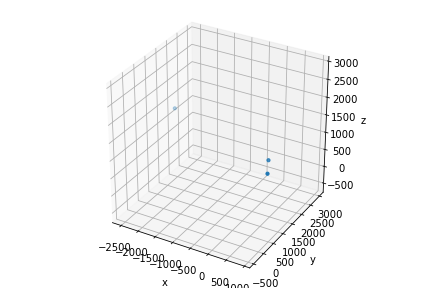

In [48]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1.0, 1.0, 1.0])

zero_Tr = np.eye(4)
c3d_helper.marker_T_at_frame_vector(1)
# marker_T0 = np.zeros((4, 4))
# marker_T0[:3, :3] = Rotation.from_euler('xyz', [np.pi/2, 0, 0]).as_matrix()
# marker_T0[:-1, -1] = [0, 0, 550]
# # marker_T0[:-1, -1] = Rotation.from_euler('xyz', [-np.pi/2, 0, 0]).as_matrix() @ marker_T0[:-1, -1]
# marker_T0[-1, -1] = 1
# print(marker_T0)

# labels = [
#         'camera:cam_back',
#         'camera:cam_right',
#         'camera:cam_left'
#         ]
vis_utils.plot_points_3d(ax, 
        proj_helper.transform_points(
            c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(1))[:3], zero_Tr))

# for i in range(len(vicon_labeled_frames)):
#     marker_T = np.linalg.inv(c3d_helper.markers_T[vicon_labeled_frames[i]])
#     print(Rotation.from_matrix(marker_T[:3, :3]).as_euler('xyz'))
#     vis_utils.plot_points_3d(ax,
#                             proj_helper.transform_points(
#                                 proj_helper.world_points[i*4:(1+i)*4],
#                                 zero_Tr
#                             )
    # )
# vis_utils.plot_points_3d(ax,
#                         proj_helper.transform_points(
#                             proj_helper.world_points[i*7:(1+i)*7],
#                             marker_T
#                         )
# )

# vis_utils.plot_frame(ax, T)

# for Tr in c3d_helper.markers_T.values():
#     vis_utils.plot_frame(ax, np.linalg.inv(Tr))
#     vis_utils.plot_frame(ax, np.linalg.inv(Tr) @ np.linalg.inv(T))

vis_utils.set_axes_equal(ax)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.tight_layout()

plt.show()

In [49]:
labels_times

array([0.1  , 0.375, 0.65 , 0.925, 1.2  ])

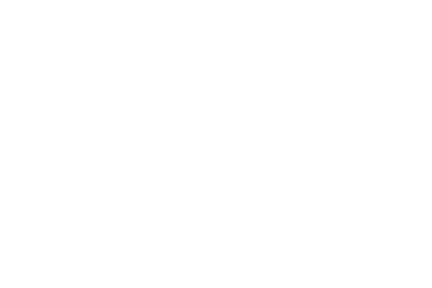

In [50]:
plt.close()
plt.clf()

In [51]:
# proj_helper.undistort_image_points()
print(proj_helper.K)

[[1208.91     0.     651.117]
 [   0.    1207.09   332.922]
 [   0.       0.       1.   ]]


In [52]:
projected_points = proj_helper.project_to_frame(
    proj_helper.transform_points(
        proj_helper.world_points, T
        )
    )

# projected_points = proj_helper.project_to_frame(
#     proj_helper.world_points
#     )

In [53]:
proj_helper.world_points

array([[ 836.46820068,  883.98590088, 1544.9095459 ,    1.        ],
       [ 718.33184814,  700.46032715,   52.35542297,    1.        ],
       [ 725.68591309, 1120.27661133,   78.59462738,    1.        ],
       [ 437.32781982, 1192.20556641, 1085.41711426,    1.        ],
       [ 832.93676758,  880.06506348, 1543.83496094,    1.        ],
       [ 719.16168213,  699.78289795,   52.14718628,    1.        ],
       [ 725.72729492, 1120.44262695,   78.44599915,    1.        ],
       [ 430.28808594, 1185.96813965, 1094.02246094,    1.        ],
       [ 828.9520874 ,  873.90576172, 1595.05786133,    1.        ],
       [ 718.32775879,  698.00341797,   53.28146744,    1.        ],
       [ 724.25872803, 1123.80895996,   78.064888  ,    1.        ],
       [ 505.86849976, 1180.97619629,  882.82965088,    1.        ],
       [ 795.38818359,  848.00598145, 1582.61279297,    1.        ],
       [ 719.2555542 ,  698.91107178,   51.77093124,    1.        ],
       [ 723.03399658, 1119.463867

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


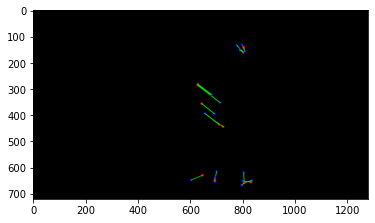

In [54]:
%matplotlib inline
plt.clf()
frame = np.zeros((720, 1280, 3))
frame = vis_utils.plot_2d_difference(frame, proj_helper.image_points, projected_points)
plt.imshow(frame)
plt.show()

0
(4, 3)
1
(4, 3)
2
(4, 3)
3
(4, 3)
4
(4, 3)


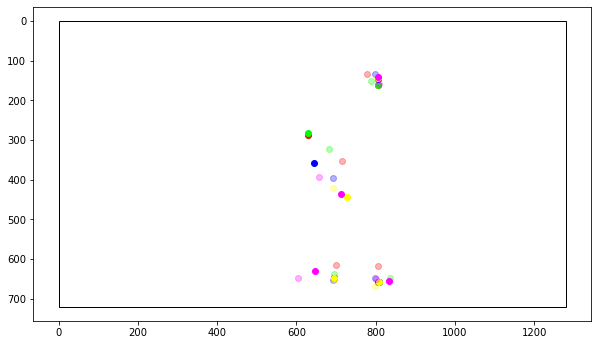

In [55]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

s = 4
colors = [
    (1.0, 0.0, 0.0),
    (0.0, 1.0, 0.0),
    (0.0, 0.0, 1.0),
    (1.0, 1.0, 0.0),
    (1.0, 0.0, 1.0),
    (0.0, 1.0, 1.0),
    (1.0, 1.0, 1.0),
    (1.0, 1.0, 1.0)
]
for i, t in enumerate(labels_times):
    print(i)
    vis_utils.plot_2d_points_plt(ax, projected_points[s*i:s*(i+1)], color=colors[i])
    print(projected_points[s*i:s*(i+1)].shape)

    alpha = 0.3
    vis_utils.plot_2d_points_plt(ax, proj_helper.image_points[s*i:s*(i+1)], color=colors[i], alpha=alpha)

ax.add_patch(Rectangle((0, 0), 1280, 720, fill=False))

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.set_xlim(min(0, xlim[0]), max(1280, xlim[1]))
ax.set_ylim(min(0, ylim[0]), max(720, ylim[1]))

ax.axes.set_aspect('equal')

plt.gca().invert_yaxis()

In [28]:
proj_helper.image_points

array([[789., 152.,   1.],
       [836., 648.,   1.],
       [695., 638.,   1.],
       [682., 322.,   1.],
       [798., 132.,   1.],
       [799., 649.,   1.],
       [693., 654.,   1.],
       [693., 395.,   1.],
       [804., 144.,   1.],
       [797., 667.,   1.],
       [695., 654.,   1.],
       [692., 421.,   1.]])

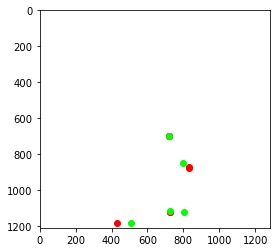

In [29]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes()

s = 7

vis_utils.plot_2d_points_plt(ax, proj_helper.world_points[:s, :2], color=(1.0, 0.0, 0.0))
vis_utils.plot_2d_points_plt(ax, proj_helper.world_points[s:s*2, :2], color=(0.0, 1.0, 0.0))


xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.set_xlim(min(0, xlim[0]), max(1280, xlim[1]))
ax.set_ylim(min(0, ylim[0]), max(720, ylim[1]))

ax.axes.set_aspect('equal')

plt.gca().invert_yaxis()

In [27]:
dvs_helper.read_events()

importIitYarp trying path: /hpe/Users/Stefano/hpe/vicon/side_f1/atis-d/


KeyboardInterrupt: 

In [ ]:
c3d_helper.find_start_time()

0.0

In [ ]:

def get_projected_points(frame_id):
    T_markers = c3d_helper.marker_T_at_frame_vector(frame_id)
    v_points = c3d_helper.get_points_frame(frame_id)
    v_points = v_points[:, :4]
    v_points[:, -1] = 1
    # rot = Rotation.from_matrix(T_markers[:3, :3]).as_rotvec()
    # t = T_markers[:-1, -1]

    # projected_points_cv2, _ = cv2.projectPoints(v_points[:, :-1].transpose(), rot, t, proj_helper.K, proj_helper.D)
    # projected_points_cv2 = projected_points_cv2[:, 0, :]

    projected_points = proj_helper.project_to_frame(
        proj_helper.transform_points(
            v_points, T @ T_markers
            )
        )
    
    return projected_points

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 30.0, (1280, 720))

for i in tqdm(range(int(1), int(c3d_helper.reader.frame_count), 3)):
    projected_points = get_projected_points(i);
    
    frame = np.ones((720, 1280, 3), dtype=np.uint8) * 100

    ts_start = c3d_helper.frame_times[i]
    frame = utils.extract_frame(dvs_helper.events, ts_start, ts_start + 0.01, (720, 1280, 3))

    frame = vis_utils.plot_2d_points(frame, projected_points)
    out.write(frame.astype(np.uint8))
out.release()

  0%|          | 0/481 [00:00<?, ?it/s]

 13%|█▎        | 64/481 [00:05<00:37, 11.18it/s]


KeyboardInterrupt: 

In [ ]:
labels = [
    'event_camera:front',
    'event_camera:side',
    'event_camera:top'
]

xs = []
for i in tqdm(range(1, int(c3d_helper.reader.frame_count / 4), 3)):
    T = c3d_helper.marker_T_at_frame_vector(i)

    rot = Rotation.from_matrix(T[:3, :3])

    xs.append(rot.as_euler('xyz'))
    # vicon_points_mark = c3d_helper.transform_points_to_marker_frame(vicon_points)

  0%|          | 0/328 [00:00<?, ?it/s]

100%|██████████| 328/328 [00:14<00:00, 22.33it/s]


In [ ]:
labels = [
    'event_camera:front',
    'event_camera:side',
    'event_camera:top'
]

start_frame = 500
end_frame = 3000
step = 2
n_frames = int((end_frame - start_frame) / step)

vicon_points = c3d_helper.get_vicon_points(np.arange(start_frame, end_frame, step), labels)
# vicon_points_mark = c3d_helper.transform_points_to_marker_frame(vicon_points)

camera_markers_points = c3d_helper.points_dict_to_array(vicon_points)
n_markers = int(camera_markers_points.shape[0] / n_frames)

frames_points = camera_markers_points.reshape(n_frames, n_markers, 4)[:, :, :3]

T_markers_list = []
for i in range(start_frame, end_frame, step):
    T_marker = c3d_helper.marker_T_at_frame_vector(i)

    X, Y, Z, U, V, W = vis_utils.XYZ_frame(T_marker)

    T_markers_list.append([X, Y, Z, U, V, W])


KeyboardInterrupt: 

In [ ]:
camera_markers_points.shape

(3750, 4)

(49, 4)


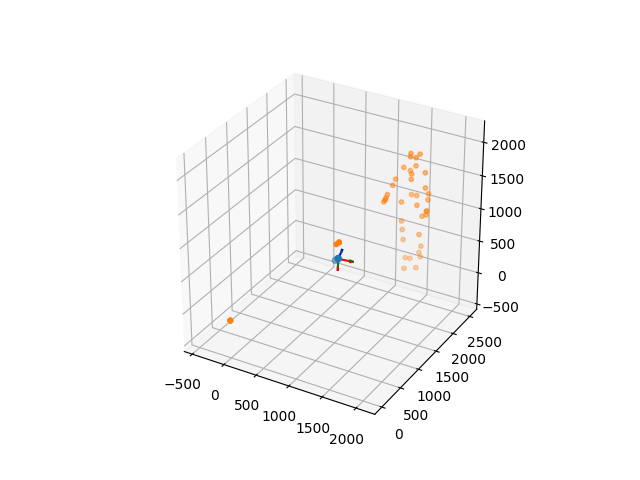

In [ ]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1.0, 1.0, 1.0])

skel = ax.scatter(frames_points[0][:, 0], frames_points[0][:, 1], frames_points[0][:, 2])

vis_utils.plot_points_3d(ax, 
        proj_helper.transform_points(
            c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(vicon_labeled_frames[0])), zero_Tr))

T_marker = c3d_helper.marker_T_at_frame_vector(start_frame)
frame_plot = vis_utils.plot_frame(ax, np.linalg.inv(T_marker))

def quiver_data_to_segments(X, Y, Z, u, v, w, length=1):
    segments = (X, Y, Z, X+v*length, Y+u*length, Z+w*length)
    segments = np.array(segments).reshape(6,-1)
    return [[[x, y, z], [u, v, w]] for x, y, z, u, v, w in zip(*list(segments))]

def update(n):
    skel._offsets3d = (frames_points[n][:, 0], frames_points[n][:, 1], frames_points[n][:, 2])
    # points._offsets3d = (sub_frames[n][:, 0], sub_frames[n][:, 1], sub_frames[n][:, 2])
    # X, Y, Z, U, V, W = T_markers_list[n]
    # segments = quiver_data_to_segments(X, Y, Z, U, V, W, length=5)
    # frame_plot.set_segments(segments)


# points = ax.scatter(sub_frames[0][:, 0], sub_frames[0][:, 1], sub_frames[0][:, 2], c='red', marker='^')
vis_utils.set_axes_equal(ax)

ani = matplotlib.animation.FuncAnimation(fig, update, range(n_frames), 
                               interval=200, blit=True)

plt.show()

In [ ]:
plt.close()

In [ ]:
labels = [
    'event_camera:front',
    'event_camera:side',
    'event_camera:top'
]

start_frame = 500
end_frame = 3000
step = 1
n_frames = int((end_frame - start_frame) / step)
# samples_times = np.linspace(14.0, 15.0, 20)
# vicon_labeled_frames = c3d_helper.get_frame_time(samples_times)
vicon_points = c3d_helper.get_vicon_points(vicon_labeled_frames, labels)
camera_markers_points = c3d_helper.points_dict_to_array(vicon_points)


In [ ]:
vicon_labeled_frames

[1562, 1662]

1.0
1.0


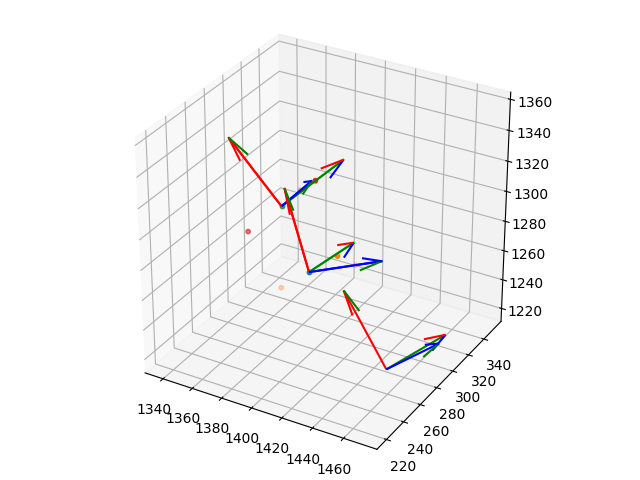

In [ ]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1.0, 1.0, 1.0])

zero_Tr = np.eye(4)

# vis_utils.plot_points_3d(ax, 
#         proj_helper.transform_points(
#             c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(vicon_labeled_frames[0])), zero_Tr))

n_frames = int(camera_markers_points.shape[0] / 3)

# for i in range(n_frames):
#     vis_utils.plot_points_3d(ax, 
#         camera_markers_points.reshape(n_frames, 3, 4)[i, :, :-1]
#     )

colors = [
    (1.0, 0.0, 0.0),
    (0.0, 1.0, 0.0),
    (0.0, 0.0, 1.0)
]

prev_mid = [0.0, 0.0, 0.0]
for i, ps in enumerate(vicon_points['points']):
    camera_front = ps['event_camera:front'][:3]
    camera_side = ps['event_camera:side'][:3]
    camera_top = ps['event_camera:top'][:3]

    side_top_mid = (camera_side + camera_top) / 2
    vis_utils.plot_points_3d(ax, np.array([side_top_mid]))

    z = camera_front - side_top_mid
    z = z / np.linalg.norm(z)

    t = camera_top - side_top_mid
    t = t / np.linalg.norm(t)

    x = np.cross(t, z)
    x = x / np.linalg.norm(x)

    y = np.cross(z, x)
    y = y / np.linalg.norm(y)

    vectors = np.vstack((x, y, z))

    print(np.linalg.det(vectors))

    vectors = vectors * 50
    x = vectors[0]
    y = vectors[1]
    z = vectors[2]

    
#     ax.plot([camera_top[0], camera_front[0], camera_side[0]], 
#             [camera_top[1], camera_front[1], camera_side[1]], 
#             [camera_top[2], camera_front[2], camera_side[2]])
    
    # ax.plot_trisurf([camera_top[0], camera_front[0], camera_side[0]], 
    #     [camera_top[1], camera_front[1], camera_side[1]], 
    #     [camera_top[2], camera_front[2], camera_side[2]],
    #     color=colors[i])
    
    ax.plot([side_top_mid[0], side_top_mid[0] + z[0]],
            [side_top_mid[1], side_top_mid[1] + z[1]],
            [side_top_mid[2], side_top_mid[2] + z[2]], c=colors[2])
    
    ax.plot([side_top_mid[0], side_top_mid[0] + y[0]],
            [side_top_mid[1], side_top_mid[1] + y[1]],
            [side_top_mid[2], side_top_mid[2] + y[2]], c=colors[1])
    
    ax.plot([side_top_mid[0], side_top_mid[0] + x[0]],
            [side_top_mid[1], side_top_mid[1] + x[1]],
            [side_top_mid[2], side_top_mid[2] + x[2]], c=colors[0])


    side_top_mid = (camera_side + camera_top) / 2
    

#     tmp = camera_front + (camera_front - side_top_mid) * 5
#     ax.plot([side_top_mid[0], tmp[0]],
#             [side_top_mid[1], tmp[1]],
#             [side_top_mid[2], tmp[2]])
    
    camera_points = np.copy(camera_markers_points.reshape(n_frames, 3, 4))
    
    vis_utils.plot_points_3d(ax, 
        camera_points[i, :, :-1]
    )

for k in sorted(c3d_helper.markers_T.keys())[:]:
    Tr = np.copy(c3d_helper.markers_T[k])

#     # Tr[:3, :3] = T_0[:3, :3] @ Tr[:3, :3]
    vis_utils.plot_frame(ax, np.linalg.inv(Tr), arrow_length=50)
#     # vis_utils.plot_frame(ax, np.linalg.inv(Tr) @ np.linalg.inv(T))
#     print(Tr[:3, :3].transpose())

vis_utils.set_axes_equal(ax)
plt.tight_layout()

plt.show()



In [ ]:
plt.close()
plt.clf()

In [ ]:
labels = [
    'event_camera:front',
    'event_camera:side',
    'event_camera:top'
]

start_frame = 500
end_frame = 3000
step = 1
n_frames = int((end_frame - start_frame) / step)

vicon_points = c3d_helper.get_vicon_points(np.arange(start_frame,end_frame, step), labels)
camera_markers_points = c3d_helper.points_dict_to_array(vicon_points)


In [ ]:
distances = []
for i, ps in enumerate(vicon_points['points']):
    camera_front = ps['event_camera:front'][:3]
    camera_side = ps['event_camera:side'][:3]
    camera_top = ps['event_camera:top'][:3]

    t  = camera_top - camera_front
    distances.append(np.linalg.norm(t))

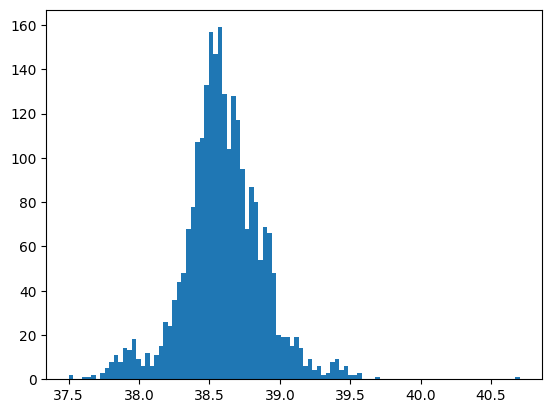

In [ ]:
%matplotlib inline
plt.clf()

distances = np.array(distances)
distances = distances[distances > 0.1]

plt.hist(distances, 100);
plt.show()

TypeError: '>' not supported between instances of 'list' and 'int'

In [ ]:
start_frame = 200
end_frame = 3500
step = 1
n_frames = int((end_frame - start_frame) / step)

rot_traj= np.zeros((n_frames, 3))
for i in tqdm(range(start_frame, end_frame, step)):
    T_marker = c3d_helper.marker_T_at_frame_vector(i)
    # T_m = np.linalg.inv(T_marker)
    # pos_traj[i - start_frame] = T_m[:-1, -1]

    rot = Rotation.from_matrix(T_marker[:3, :3]).as_euler('xyz')

    rot_traj[i - start_frame] = rot


  0%|          | 0/3300 [00:00<?, ?it/s]

 63%|██████▎   | 2078/3300 [03:53<03:58,  5.12it/s]/home/schiavazza/code/hpe/vicon_recordings/src/data_helpers.py:163: RuntimeWarning: invalid value encountered in divide
  t  = t / np.linalg.norm(t)
/home/schiavazza/code/hpe/vicon_recordings/src/data_helpers.py:166: RuntimeWarning: invalid value encountered in divide
  f = f / np.linalg.norm(f)
/tmp/ipykernel_31243/3012687754.py:12: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  rot = Rotation.from_matrix(T_marker[:3, :3]).as_euler('xyz')
 70%|███████   | 2322/3300 [04:48<03:41,  4.41it/s]

 70%|███████   | 2324/3300 [04:48<03:48,  4.27it/s]

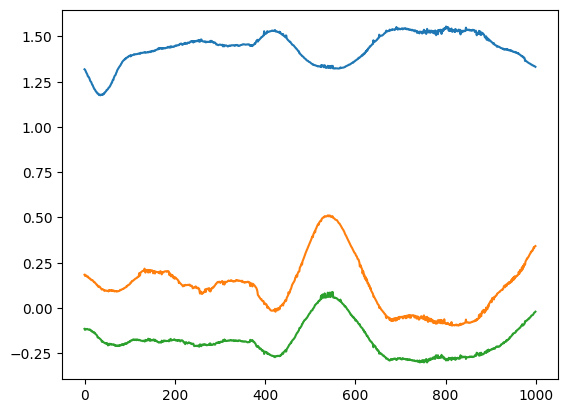

In [ ]:
plt.plot(rot_traj)

In [ ]:
camera_markers_points.shape

(7500, 4)

In [ ]:
pos_traj.shape

(2500, 3)

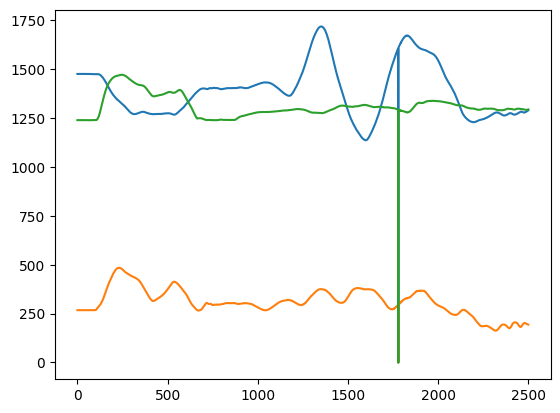

In [ ]:
plt.plot(camera_markers_points.reshape(2500, 3, 4)[:, 0, :-1])

In [26]:

labels = ['P3:RFOO']
points = c3d_helper.get_vicon_points(range(1, int(c3d_helper.reader.frame_count)), labels)

In [27]:
points

{'points': [{'P3:RFOO': array([ 725.02814, 1120.5168 ,   78.58247], dtype=float32)},
  {'P3:RFOO': array([ 725.0567 , 1120.5159 ,   78.57121], dtype=float32)},
  {'P3:RFOO': array([ 725.0998  , 1120.4935  ,   78.555595], dtype=float32)},
  {'P3:RFOO': array([ 725.10284, 1120.4318 ,   78.57215], dtype=float32)},
  {'P3:RFOO': array([ 725.1308 , 1120.4193 ,   78.57676], dtype=float32)},
  {'P3:RFOO': array([ 725.1562 , 1120.4742 ,   78.59119], dtype=float32)},
  {'P3:RFOO': array([ 725.1492 , 1120.4882 ,   78.59536], dtype=float32)},
  {'P3:RFOO': array([ 725.11914 , 1120.491   ,   78.600075], dtype=float32)},
  {'P3:RFOO': array([ 725.07697, 1120.4423 ,   78.59255], dtype=float32)},
  {'P3:RFOO': array([ 725.0624  , 1120.4817  ,   78.588005], dtype=float32)},
  {'P3:RFOO': array([ 725.04816 , 1120.5332  ,   78.556114], dtype=float32)},
  {'P3:RFOO': array([ 724.97614, 1120.532  ,   78.53561], dtype=float32)},
  {'P3:RFOO': array([ 724.9403 , 1120.5242 ,   78.50039], dtype=float32)},
  {

In [28]:
p_hist = []
for p in points['points']:
    print(list(p.values())[0])
    p_hist.append(list(p.values())[0])

[ 725.02814 1120.5168    78.58247]
[ 725.0567  1120.5159    78.57121]
[ 725.0998   1120.4935     78.555595]
[ 725.10284 1120.4318    78.57215]
[ 725.1308  1120.4193    78.57676]
[ 725.1562  1120.4742    78.59119]
[ 725.1492  1120.4882    78.59536]
[ 725.11914  1120.491      78.600075]
[ 725.07697 1120.4423    78.59255]
[ 725.0624   1120.4817     78.588005]
[ 725.04816  1120.5332     78.556114]
[ 724.97614 1120.532     78.53561]
[ 724.9403  1120.5242    78.50039]
[ 724.93024 1120.5092    78.51274]
[ 724.8895  1120.4834    78.45356]
[ 724.9139  1120.4542    78.44946]
[ 724.92773  1120.4554     78.428894]
[ 724.959    1120.4396     78.407646]
[ 724.9666   1120.4644     78.408295]
[ 725.0361  1120.4022    78.43887]
[ 725.125   1120.3951    78.42237]
[ 725.1724  1120.4272    78.45473]
[ 725.2418   1120.3807     78.449104]
[ 725.342    1120.3899     78.453445]
[ 725.3537  1120.3531    78.45525]
[ 725.4165  1120.3113    78.47057]
[ 725.49084 1120.2892    78.48302]
[ 725.5203  1120.2759    78.

In [29]:
p_hist = np.array(p_hist)

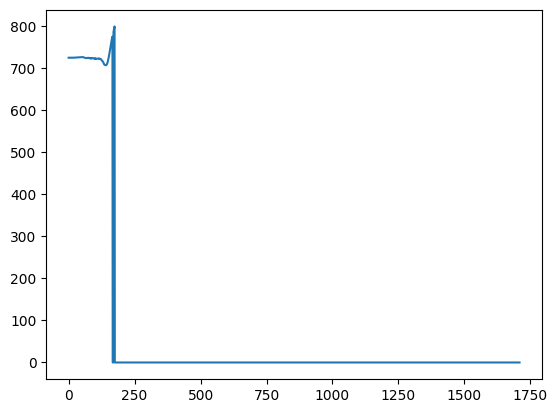

In [30]:
plt.plot(p_hist[:, 0])

In [39]:
r = []
for f in c3d_helper.reader.read_frames():
    r.append(np.count_nonzero(f[1][:, 0]))

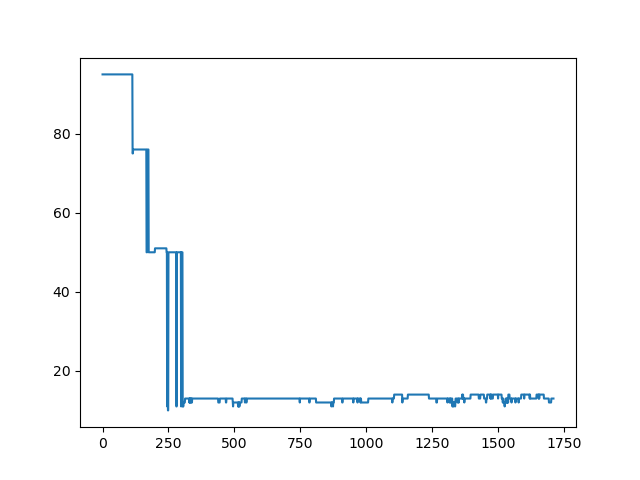

In [40]:
plt.plot(r)